<a href="https://colab.research.google.com/github/jrchac/Thesis-Project-Feele/blob/main/G2020_Statistical_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garage2020: Statistical Data Analysis

## Importing Cleaned Data

In [ ]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
%run G2020_Cleaning_Data.ipynb   # this is were our functions are stored

data = cleaning() #it takes long to execute (4min30s)

## Statisitcal Data Analysis: Tests

### Separating relevant groups

In [ ]:
# creating a new column to differentiate between young adults and adults (24+)
data['youth'] = data['response_age'].apply(lambda x: 1 if x < 25 else 0)

In [ ]:
# only users with steps
step_data = data[data['daily_steps'] != -1]
good_data = step_data[step_data['question_1'] == 'Goed']
okay_data = step_data[step_data['question_1'] == 'Oke']
not_okay_data = step_data[step_data['question_1'] == 'Niet oke']

# only users without steps
no_step_data = data[data['daily_steps'] == -1]
good_ws = no_step_data[no_step_data['question_1'] == 'Goed']
okay_ws = no_step_data[no_step_data['question_1'] == 'Oke']
not_okay_ws = no_step_data[no_step_data['question_1'] == 'Niet oke']

In [ ]:
# only young adults with steps
youth_data = step_data[step_data['youth'] == 1]
# only adults (+24) with steps
adult_data = step_data[step_data['youth'] == 0]

In [ ]:
# users by gender
she_data = step_data[step_data['gender']=='she']
he_data = step_data[step_data['gender']=='he']
them_data  =step_data[step_data['gender']=='them']
na_data = step_data[step_data['gender']=='not_say']

### Functions

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy.stats import kruskal
from scipy.stats import f_oneway

**Description Statistical Tests**:

1. **Chi square:**
- testing independence / testing if several groups have same data distribution.


2. **Kruskal Wallis:**

- It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann–Whitney U test, which is used for comparing only two groups.

- The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA).

3. **ANOVA:**
- A one-way analysis of variance (ANOVA) is used when you have a categorical independent variable (with two or more categories) and a  dependent variable and you wish to test for differences in the means of the dependent variable broken down by the levels of the independent variable.


Some inspiration from: https://stats.oarc.ucla.edu/spss/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-spss/#:~:text=A%20one%2Dway%20analysis%20of,levels%20of%20the%20independent%20variable.

Note: 2 and 3 are used only for the relationship of different groups with daily steps

In [ ]:
def chi_square(data, group, feature):
  df = pd.DataFrame(data)
  contingency_table = pd.crosstab(df[group], df[feature])

  # Perform Chi-Square test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  # Print results
  print("Chi-Square Statistic:", chi2)
  print("P-value:", p)
  print("Degrees of Freedom:", dof)
  print("Expected Frequencies:")
  print(expected)

In [ ]:
def kruskal_wallis_test(data, group, feature):
    # If data is provided as dictionary-like object, convert it to DataFrame
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)

    # Perform the Kruskal-Wallis test
    groups = [data[data[group] == grp][feature].values for grp in data[group].unique()]
    H, p_value = kruskal(*groups)

    # Print results
    print("Kruskal-Wallis Test Results:")
    print("H statistic:", H)
    print("P-value:", p_value)

    return H, p_value

In [ ]:
def kruskal_wallis_question1(data):
    """
    Perform Kruskal-Wallis test to test for significant differences in daily steps based on the values in the 'question_1' column.

    Args:
    data (DataFrame): DataFrame containing the data.

    Returns:
    None. Prints Kruskal-Wallis test results and interpretation.
    """
    # Extract daily steps for each group based on the values in 'question_1'
    goed_steps = data[data['question_1'] == 'Goed']['daily_steps']
    oke_steps = data[data['question_1'] == 'Oke']['daily_steps']
    niet_oke_steps = data[data['question_1'] == 'Niet oke']['daily_steps']

    # Perform Kruskal-Wallis test
    statistic, p_value = kruskal(goed_steps, oke_steps, niet_oke_steps)

    # Print Kruskal-Wallis test results
    print("Kruskal-Wallis Test Results:")
    print("Test Statistic:", statistic)
    print("P-value:", p_value)

    # Interpret results
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference in daily steps based on the values in 'question_1'.")
    else:
        print("There is no significant difference in daily steps based on the values in 'question_1'.")

In [ ]:
def anova_age(data, pval):
    """
    Perform ANOVA to test for significant differences in daily steps between youth and adult groups.

    Args:
    data (DataFrame): DataFrame containing the data.

    Returns:
    None. Prints ANOVA results and interpretation.
    """
    # Extract daily steps for youth and adult groups
    young_steps = data[data['youth'] == 1]['daily_steps']
    adult_steps = data[data['youth'] == 0]['daily_steps']

    # Perform ANOVA
    f_statistic, p_value = f_oneway(young_steps, adult_steps)

    # Print ANOVA results
    print("ANOVA Results:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Interpret results
    alpha = pval
    if p_value < alpha:
        print("There is a significant difference in daily steps between youth and adult groups.")
    else:
        print("There is no significant difference in daily steps between youth and adult groups.")


In [ ]:
def anova_question1(data, pval):
    """
    Perform ANOVA to test for significant differences in daily steps based on the values in the 'question_1' column.

    Args:
    data (DataFrame): DataFrame containing the data.

    Returns:
    None. Prints ANOVA results and interpretation.
    """
    # Extract daily steps for each group based on the values in 'question_1'
    goed_steps = data[data['question_1'] == 'Goed']['daily_steps']
    oke_steps = data[data['question_1'] == 'Oke']['daily_steps']
    niet_oke_steps = data[data['question_1'] == 'Niet oke']['daily_steps']

    # Perform ANOVA
    f_statistic, p_value = f_oneway(goed_steps, oke_steps, niet_oke_steps)

    # Print ANOVA results
    print("ANOVA Results:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Interpret results
    alpha = pval
    if p_value < alpha:
        print("There is a significant difference in daily steps based on the values in 'question_1'.")
    else:
        print("There is no significant difference in daily steps based on the values in 'question_1'.")

In [ ]:
def anova_gender(data, pval):
    """
    Perform ANOVA to test for significant differences in daily steps based on the values in the 'gender' column.

    Args:
    data (DataFrame): DataFrame containing the data.

    Returns:
    None. Prints ANOVA results and interpretation.
    """
    # Extract daily steps for each gender group
    she_steps = data[data['gender'] == 'she']['daily_steps']
    he_steps = data[data['gender'] == 'he']['daily_steps']
    them_steps = data[data['gender'] == 'them']['daily_steps']
    not_say_steps = data[data['gender'] == 'not_say']['daily_steps']

    # Perform ANOVA
    f_statistic, p_value = f_oneway(she_steps, he_steps, them_steps, not_say_steps)

    # Print ANOVA results
    print("ANOVA Results:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Interpret results
    alpha = pval
    if p_value < alpha:
        print("There is a significant difference in daily steps based on gender.")
    else:
        print("There is no significant difference in daily steps based on gender.")


### Gender-related

In [ ]:
chi_square(data, 'gender', 'question_1')

Chi-Square Statistic: 58.624429371397
P-value: 8.561397340043105e-11
Degrees of Freedom: 6
Expected Frequencies:
[[ 6989.04305574  3176.21433392  6770.74261034]
 [  132.88095559    60.38858145   128.73046295]
 [16880.00809826  7671.22526657 16352.76663517]
 [  458.0678904    208.17181806   443.76029154]]


Interpretation:

- Since the p-value (8.60e-11) is much smaller than the conventional significance level of 0.05, you reject the null hypothesis of independence.
- This means that there is a significant association between gender and the responses to "question_1".
- The expected frequencies (the last part of the output) show what would be expected if there were no association between gender and responses. The observed frequencies (not shown here) would deviate from these expected frequencies.

In summary, based on these results, you would conclude that there is a significant difference in responses to "question_1" across genders.

In [ ]:
#chi_square(data, 'gender', 'question_2')

In [ ]:
#chi_square(data, 'gender', 'question_3')

In [ ]:
#chi_square(data, 'gender', 'question_4')

In [ ]:
#chi_square(data, 'gender', 'question_5')

Conclusion: there is a significant difference in responses to every question across genders.

### Age-related

In [ ]:
chi_square(data, 'youth', 'question_1')

Chi-Square Statistic: 118.86277347850567
P-value: 1.5462392286555947e-26
Degrees of Freedom: 2
Expected Frequencies:
[[10694.85355649  4860.34309623 10360.80334728]
 [13765.14644351  6255.65690377 13335.19665272]]


In [ ]:
#chi_square(data, 'youth', 'question_2')

In [ ]:
#chi_square(data, 'youth', 'question_3')

In [ ]:
#chi_square(data, 'youth', 'question_4')

In [ ]:
#chi_square(data, 'youth', 'question_5')

Conclusion: there is a significant difference in responses to every question across group ages

In [ ]:
kruskal_wallis_test(data, 'youth', 'question_1')

Kruskal-Wallis Test Results:
H statistic: 95.12285726112478
P-value: 1.789287766717543e-22


(95.12285726112478, 1.789287766717543e-22)

In [ ]:
kruskal_wallis_test(data, 'youth', 'question_2')

Kruskal-Wallis Test Results:
H statistic: 73.66919663270053
P-value: 9.236914495113667e-18


(73.66919663270053, 9.236914495113667e-18)

In [ ]:
# not sure if the kruskal wallis can be used with in these cases / I'll double check this

### Steps-related

ANOVA would evaluate whether the mean value of x differs among the groups identified by y.

(We use only observations that contain steps)

In [ ]:
p_value = 0.05
anova_question1(step_data, p_value)

ANOVA Results:
F-statistic: 55.084613023880806
P-value: 1.3778078528898369e-24
There is a significant difference in daily steps based on the values in 'question_1'.


In [ ]:
anova_age(step_data, p_value)

ANOVA Results:
F-statistic: 1.9692453198854027
P-value: 0.16054267943750633
There is no significant difference in daily steps between youth and adult groups.


In [ ]:
#kruskal_wallis_question1(data)
kruskal_wallis_question1(step_data)

Kruskal-Wallis Test Results:
Test Statistic: 141.08342956055847
P-value: 2.3127171820025056e-31
There is a significant difference in daily steps based on the values in 'question_1'.


In [ ]:
anova_gender(step_data, p_value)

ANOVA Results:
F-statistic: 103.45434678679591
P-value: 1.7445551471289608e-66
There is a significant difference in daily steps based on gender.


## Descriptive Analytics

Now that we know that there is a significant difference in most tested relationships, we need to investigate these differences.

### Question 1

In [ ]:
def boxplot(data, group):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=group, y='daily_steps', data=data)
    plt.title('Distribution of Daily Steps by Age Group')
    plt.xlabel('Group')
    plt.ylabel('Daily Steps')
    plt.show()

In [ ]:
descriptive_stats = {}

# Calculate descriptive statistics for each group
for group_name, group_data in [("Good", good_data), ("Okay", okay_data), ("Not Okay", not_okay_data)]:
    descriptive_stats[group_name] = group_data["daily_steps"].describe()

# Convert the dictionary into a DataFrame
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Print the DataFrame
print(descriptive_stats_df)

               Good          Okay      Not Okay
count   8405.000000   8621.000000   4113.000000
mean    6098.746341   5657.543440   5248.467785
std     4478.458800   4381.252973   4261.406201
min        1.000000      0.000000      8.000000
25%     2775.000000   2392.000000   2031.000000
50%     5252.000000   4806.000000   4271.000000
75%     8367.000000   7898.000000   7390.000000
max    36672.000000  36672.000000  33702.000000


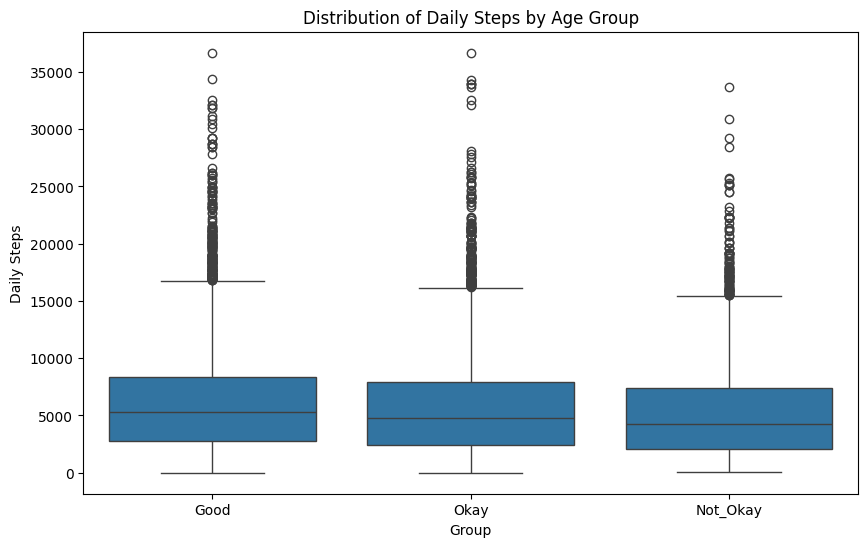

In [ ]:
#not_okay_data = not_okay_data.drop(index = not_okay_data[not_okay_data['daily_step'] == 110186].index) #removing an outlier
question1_data = pd.concat([good_data.assign(question_1 ='Good'),
                             okay_data.assign(question_1 ='Okay'),
                             not_okay_data.assign(question_1 ='Not_Okay')])

boxplot(question1_data, 'question_1')

### Age Group

In [ ]:
descriptive_stats2 = {}

# Calculate descriptive statistics for each group
for group_name, group_data in [("Young adults", youth_data), ("Adults", adult_data)]:
    descriptive_stats2[group_name] = group_data["daily_steps"].describe()

# Convert the dictionary into a DataFrame
descriptive_stats_df = pd.DataFrame(descriptive_stats2)

print(descriptive_stats_df)

       Young adults        Adults
count  12641.000000   8498.000000
mean    5788.261688   5701.479995
std     4371.112281   4463.393844
min        0.000000      0.000000
25%     2473.000000   2470.500000
50%     5000.000000   4716.000000
75%     8092.000000   7843.250000
max    36672.000000  34405.000000


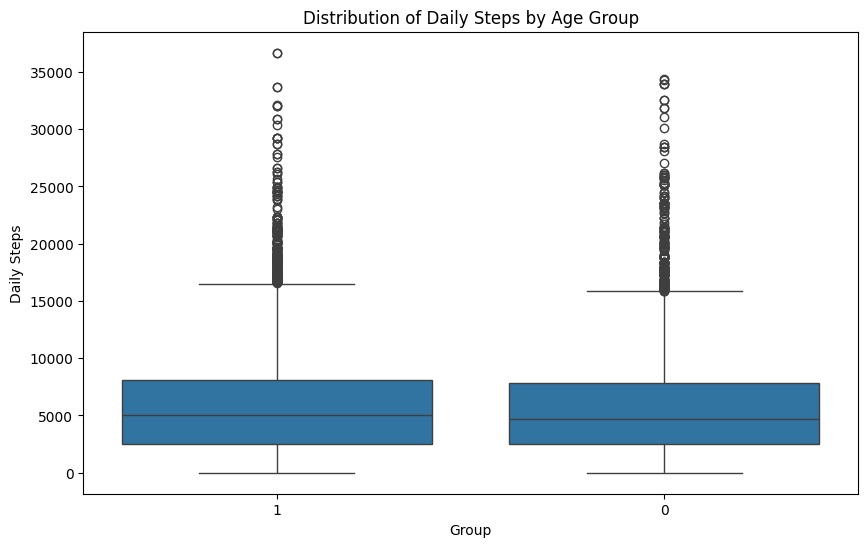

In [ ]:
# adult_data = adult_data.drop(index = adult_data[adult_data['daily_step'] == 110186].index)
all_data = pd.concat([youth_data.assign(youth='1'), adult_data.assign(youth='0')])

boxplot(all_data, 'youth')

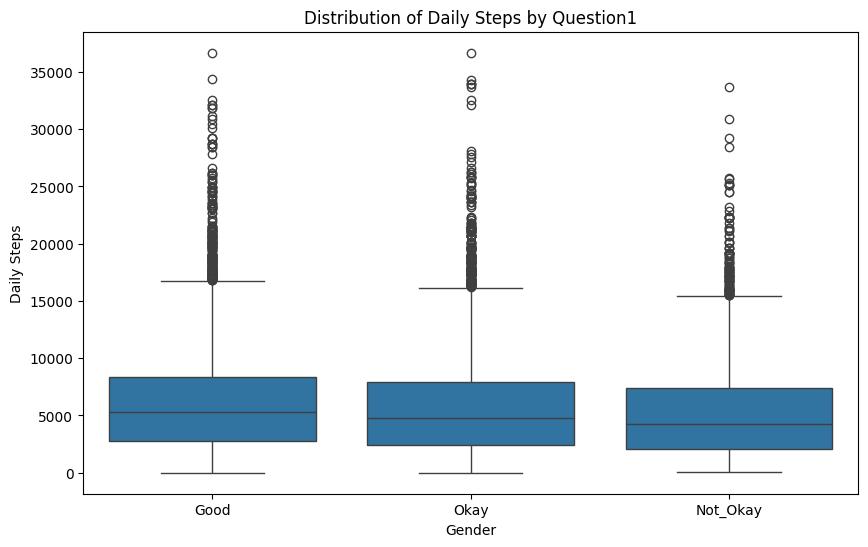

In [ ]:
# not_okay_data = not_okay_data.drop(index = not_okay_data[not_okay_data['daily_step'] == 110186].index) #removing an outlier
question1_data = pd.concat([good_data.assign(question_1 ='Good'),
                             okay_data.assign(question_1 ='Okay'),
                             not_okay_data.assign(question_1 ='Not_Okay')])

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='question_1', y='daily_steps', data=question1_data)
plt.title('Distribution of Daily Steps by Question1')
plt.xlabel('Gender')
plt.ylabel('Daily Steps')
plt.show()

### Gender

In [ ]:
descriptive_stats3 = {}

# Calculate descriptive statistics for each group
for group_name, group_data in [("She", she_data), ("He", he_data), ("Them", them_data), ("Not Say", na_data)]:
    descriptive_stats3[group_name] = group_data["daily_steps"].describe()

# Convert the dictionary into a DataFrame
descriptive_stats_df = pd.DataFrame(descriptive_stats3)

# Print the DataFrame
print(descriptive_stats_df)

                She            He          Them       Not Say
count  13682.000000   6722.000000    691.000000     44.000000
mean    5495.425376   6448.454180   4227.429812   3739.090909
std     4223.882936   4746.364591   3600.193550   3189.847214
min        0.000000      0.000000     80.000000    202.000000
25%     2321.000000   2946.000000   1107.000000    945.750000
50%     4659.000000   5577.500000   3705.000000   3079.500000
75%     7616.000000   9091.750000   6015.000000   5017.000000
max    36672.000000  34405.000000  23819.000000  16017.000000


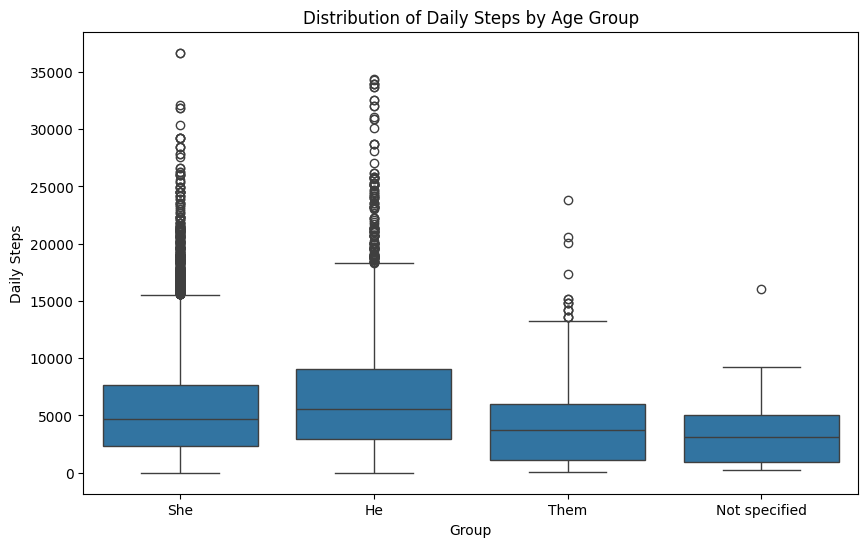

In [ ]:
# sorted(he_data['daily_step'], reverse=True)
he_data = he_data.drop(index = he_data[he_data['daily_steps'] == 110186].index) # delete the outlier from he_data
all_gender_data = pd.concat([she_data.assign(gender='She'),
                             he_data.assign(gender='He'),
                             them_data.assign(gender='Them'),
                             na_data.assign(gender='Not specified')])

boxplot(all_gender_data, 'gender')

### Tukey HSD Test



idea from: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/

In [ ]:
from statsmodels.stats.multicomp import MultiComparison


def anova_and_tukey(data):
  df = pd.DataFrame(data)

  anova_result = f_oneway(df[df['question_1'] == 'Goed']['daily_steps'],
                          df[df['question_1'] == 'Oke']['daily_steps'],
                          df[df['question_1'] == 'Niet oke']['daily_steps'])

  print("ANOVA Results:")
  print("F-statistic:", anova_result.statistic)
  print("p-value:", anova_result.pvalue)

  # Perform Tukey HSD test
  multi_comp = MultiComparison(df['daily_steps'], df['question_1'])
  tukey_result = multi_comp.tukeyhsd()

  print("\nTukey HSD Results:")
  print(tukey_result)

  # Plot Tukey HSD results
  tukey_result.plot_simultaneous(comparison_name='Goed', xlabel='Daily Steps', ylabel='Response')
  plt.title('Tukey HSD for Daily Steps by Response to Question 1')
  plt.show()

ANOVA Results:
F-statistic: 6.267683264636829
p-value: 0.0018978747869502122

Tukey HSD Results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower    upper   reject
------------------------------------------------------------
    Goed Niet oke -153.6676 0.0012 -255.8485 -51.4867   True
    Goed      Oke   -37.336 0.5298 -118.7602  44.0881  False
Niet oke      Oke  116.3316 0.0216   13.6373 219.0259   True
------------------------------------------------------------


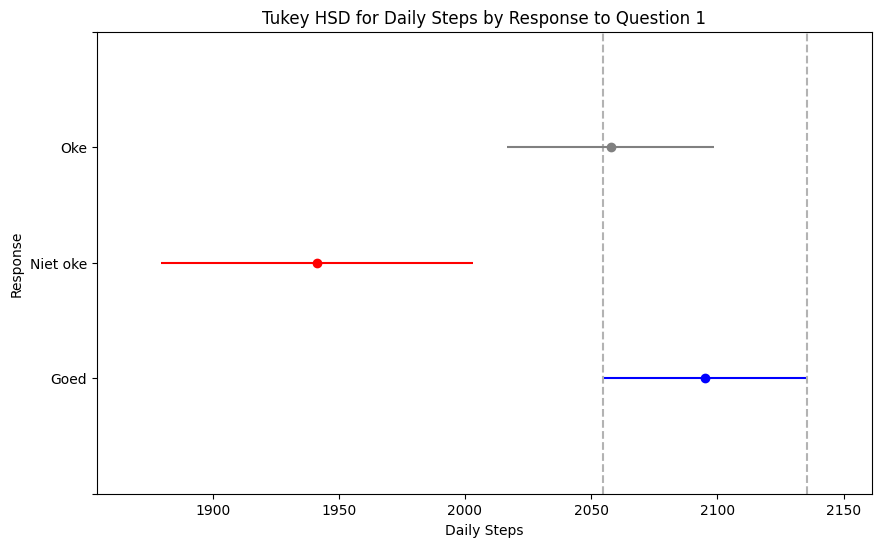

In [ ]:
anova_and_tukey(data)

Interpretation:

- There is a statistically significant difference in daily step count between "Goed" and "Niet oke" groups (p-adj = 0.003), where "Goed" group has a significantly lower mean daily step count compared to "Niet oke" group.
§- There is not a statistically significant difference in daily step count between "Goed" and "Oke" groups (p-adj = 0.5343), as the p-value is greater than 0.05.
- There is a statistically significant difference in daily step count between "Niet oke" and "Oke" groups (p-adj = 0.0415), where "Niet oke" group has a significantly lower mean daily step count compared to "Oke" group


Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1  324.095   0.0 262.2867 385.9033   True
-----------------------------------------------------


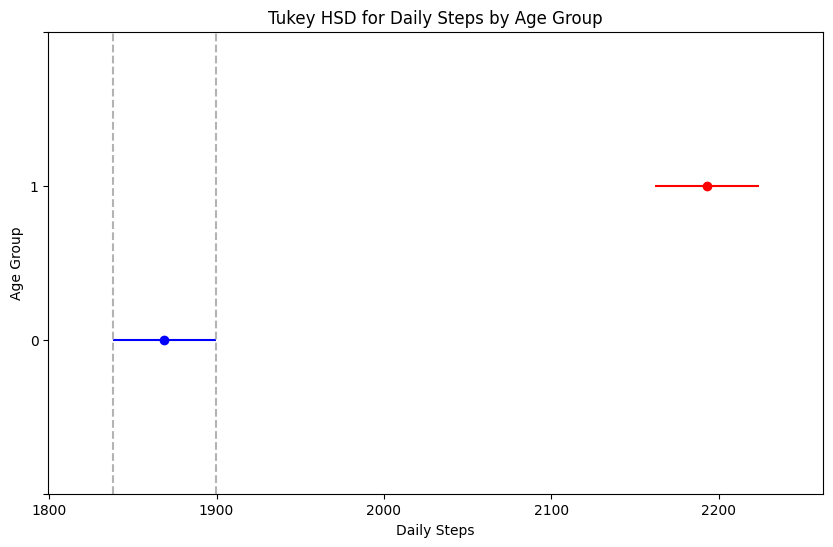

In [ ]:
# Perform Tukey HSD test
multi_comp = MultiComparison(data['daily_steps'], data['youth'])
tukey_result = multi_comp.tukeyhsd()

print("\nTukey HSD Results:")
print(tukey_result)

# Plot Tukey HSD results
tukey_result.plot_simultaneous(comparison_name=0, xlabel='Daily Steps', ylabel='Age Group')
plt.title('Tukey HSD for Daily Steps by Age Group')
plt.show()
# 1 is young adults
# 0 is adults

## Conclusion

SDA Conclusions

Statistical differences between groups:

- Stastistical significant differences found in:
    - Gender and Steps
    - Gender and Question1
    - Age and Question1

- NO stastistical significant differences in:
    - Age and Steps


In other words, gender affects the number of steps and the answers of the question-1 significantly. On the other hand, the age is only determinant when measuring the question-1 answers and not when measuring the steps.